# Distribution Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets
import plotly as py
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import math
import sklearn
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.pipeline import Pipeline
from IPython.display import Image

## Task 1: Distribution Analysis
### M1.1 Compare NC and KY on Opioid Mortality - 2019 Data

In [2]:
file1='../data/superdf_ajay.csv'
df = pd.read_csv(file1, encoding='latin-1')
df

State  County Code  Opiod_Dispensing_Rate                 County  \
0       AL         1001                  101.3     Autauga County, AL   
1       AL         1003                   67.6     Baldwin County, AL   
2       AL         1005                   27.2     Barbour County, AL   
3       AL         1007                   21.0        Bibb County, AL   
4       AL         1009                   23.7      Blount County, AL   
...    ...          ...                    ...                    ...   
2522    WY        56033                   33.5    Sheridan County, WY   
2523    WY        56037                   70.0  Sweetwater County, WY   
2524    WY        56039                   54.6       Teton County, WY   
2525    WY        56041                   59.5       Uinta County, WY   
2526    WY        56043                   46.7    Washakie County, WY   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
0        1087149      83          7.6                1                 0   
1        3758097     535         14.2                1                 1   
2         574442      14          2.4                1                 3   
3         464942      56         12.0                1                 5   
4        1171455     168         14.3                1                 7   
...          ...     ...          ...              ...               ...   
2522      598998      61         10.2               47               103   
2523      873221     123         14.1               47               105   
2524      440125      13          3.0               47               107   
2525      426347      61         14.3               47               109   
2526      172114      14          8.1               47               111   

      5-digit FIPS Code  ... Male population 18-44 raw value  \
0                  1000  ...                             NaN   
1                  1001  ...                             NaN   
2                  1003  ...                             NaN   
3                  1005  ...                             NaN   
4                  1007  ...                             NaN   
...                 ...  ...                             ...   
2522              47103  ...                             NaN   
2523              47105  ...                             NaN   
2524              47107  ...                             NaN   
2525              47109  ...                             NaN   
2526              47111  ...                             NaN   

     Male population 45-64 raw value  Male population 65+ raw value  \
0                                NaN                            NaN   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
2522                             NaN                            NaN   
2523                             NaN                            NaN   
2524                             NaN                            NaN   
2525                             NaN                            NaN   
2526                             NaN                            NaN   

      Total male population raw value  Female population 0-17 raw value  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   
...                               ...                               ...   
2522                              NaN                               

In [3]:
statea=["NC"]
NC=df.loc[df['State'].isin(statea)]
NC

State  County Code  Opiod_Dispensing_Rate                County  \
1493    NC        37001                   34.2   Alamance County, NC   
1494    NC        37003                    6.0  Alexander County, NC   
1495    NC        37005                   39.9  Alleghany County, NC   
1496    NC        37007                    8.4      Anson County, NC   
1497    NC        37009                   46.2       Ashe County, NC   
...    ...          ...                    ...                   ...   
1587    NC        37191                   41.9      Wayne County, NC   
1588    NC        37193                   33.4     Wilkes County, NC   
1589    NC        37195                   34.0     Wilson County, NC   
1590    NC        37197                   28.6     Yadkin County, NC   
1591    NC        37199                   35.7     Yancey County, NC   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
1493     3109711     411         13.2               28               135   
1494      760950     121         15.9               28               137   
1495      229301      25         10.9               28               139   
1496      544931      43          7.9               28               141   
1497      552807      83         15.0               28               143   
...          ...     ...          ...              ...               ...   
1587     2518873     282         11.2               29               157   
1588     1432317     394         27.5               29               159   
1589     1657255     161          9.7               29               161   
1590      789496     127         16.1               29               163   
1591      373081      77         20.6               29               165   

      5-digit FIPS Code  ... Male population 18-44 raw value  \
1493              28135  ...                             NaN   
1494              28137  ...                             NaN   
1495              28139  ...                             NaN   
1496              28141  ...                             NaN   
1497              28143  ...                             NaN   
...                 ...  ...                             ...   
1587              29157  ...                             NaN   
1588              29159  ...                             NaN   
1589              29161  ...                             NaN   
1590              29163  ...                             NaN   
1591              29165  ...                             NaN   

     Male population 45-64 raw value  Male population 65+ raw value  \
1493                             NaN                            NaN   
1494                             NaN                            NaN   
1495                             NaN                            NaN   
1496                             NaN                            NaN   
1497                             NaN                            NaN   
...                              ...                            ...   
1587                             NaN                            NaN   
1588                             NaN                            NaN   
1589                             NaN                            NaN   
1590                             NaN                            NaN   
1591                             NaN                            NaN   

      Total male population raw value  Female population 0-17 raw value  \
1493                              NaN                               NaN   
1494                              NaN                               NaN   
1495                              NaN                               NaN   
1496                              NaN                               NaN   
1497                              NaN                               NaN   
...                               ...                               ...   
1587                              NaN                               NaN   
1588 

In [4]:
stateb=["KY"]
KY=df.loc[df['State'].isin(stateb)]
KY

State  County Code  Opiod_Dispensing_Rate               County  \
774    KY        21001                   71.3     Adair County, KY   
775    KY        21003                   44.5     Allen County, KY   
776    KY        21005                   23.3  Anderson County, KY   
777    KY        21007                    4.5   Ballard County, KY   
778    KY        21009                   67.9    Barren County, KY   
..    ...          ...                    ...                  ...   
885    KY        21231                  105.5     Wayne County, KY   
886    KY        21233                   46.8   Webster County, KY   
887    KY        21235                  160.5   Whitley County, KY   
888    KY        21237                   79.1     Wolfe County, KY   
889    KY        21239                   32.7  Woodford County, KY   

     Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
774      387950      43         11.1               18               125   
775      411770      54         13.1               18               127   
776      440394      77         17.5               18               129   
777      172107      17          9.9               18               131   
778      871323      81          9.3               18               133   
..          ...     ...          ...              ...               ...   
885      429964      59         13.7               19               161   
886      286195      28          9.8               19               163   
887      755762     232         30.7               19               165   
888      150925      49         32.5               19               167   
889      519121      79         15.2               19               169   

     5-digit FIPS Code  ... Male population 18-44 raw value  \
774              18125  ...                             NaN   
775              18127  ...                             NaN   
776              18129  ...                             NaN   
777              18131  ...                             NaN   
778              18133  ...                             NaN   
..                 ...  ...                             ...   
885              19161  ...                             NaN   
886              19163  ...                             NaN   
887              19165  ...                             NaN   
888              19167  ...                             NaN   
889              19169  ...                             NaN   

    Male population 45-64 raw value  Male population 65+ raw value  \
774                             NaN                            NaN   
775                             NaN                            NaN   
776                             NaN                            NaN   
777                             NaN                            NaN   
778                             NaN                            NaN   
..                              ...                            ...   
885                             NaN                            NaN   
886                             NaN                            NaN   
887                             NaN                            NaN   
888                             NaN                            NaN   
889                             NaN                            NaN   

     Total male population raw value  Female population 0-17 raw value  \
774                              NaN                               NaN   
775                              NaN                               NaN   
776                              NaN                               NaN   
777                              NaN                               NaN   
778                              NaN                               NaN   
..                               ...                               ...   
885                              NaN                               NaN   
886                              NaN                               NaN  

In [5]:
state2=["NC","KY"]
NCKY=df.loc[df['State'].isin(state2)]
NCKY

State  County Code  Opiod_Dispensing_Rate               County  \
774     KY        21001                   71.3     Adair County, KY   
775     KY        21003                   44.5     Allen County, KY   
776     KY        21005                   23.3  Anderson County, KY   
777     KY        21007                    4.5   Ballard County, KY   
778     KY        21009                   67.9    Barren County, KY   
...    ...          ...                    ...                  ...   
1587    NC        37191                   41.9     Wayne County, NC   
1588    NC        37193                   33.4    Wilkes County, NC   
1589    NC        37195                   34.0    Wilson County, NC   
1590    NC        37197                   28.6    Yadkin County, NC   
1591    NC        37199                   35.7    Yancey County, NC   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
774       387950      43         11.1               18               125   
775       411770      54         13.1               18               127   
776       440394      77         17.5               18               129   
777       172107      17          9.9               18               131   
778       871323      81          9.3               18               133   
...          ...     ...          ...              ...               ...   
1587     2518873     282         11.2               29               157   
1588     1432317     394         27.5               29               159   
1589     1657255     161          9.7               29               161   
1590      789496     127         16.1               29               163   
1591      373081      77         20.6               29               165   

      5-digit FIPS Code  ... Male population 18-44 raw value  \
774               18125  ...                             NaN   
775               18127  ...                             NaN   
776               18129  ...                             NaN   
777               18131  ...                             NaN   
778               18133  ...                             NaN   
...                 ...  ...                             ...   
1587              29157  ...                             NaN   
1588              29159  ...                             NaN   
1589              29161  ...                             NaN   
1590              29163  ...                             NaN   
1591              29165  ...                             NaN   

     Male population 45-64 raw value  Male population 65+ raw value  \
774                              NaN                            NaN   
775                              NaN                            NaN   
776                              NaN                            NaN   
777                              NaN                            NaN   
778                              NaN                            NaN   
...                              ...                            ...   
1587                             NaN                            NaN   
1588                             NaN                            NaN   
1589                             NaN                            NaN   
1590                             NaN                            NaN   
1591                             NaN                            NaN   

      Total male population raw value  Female population 0-17 raw value  \
774                               NaN                               NaN   
775                               NaN                               NaN   
776                               NaN                               NaN   
777                               NaN                               NaN   
778                               NaN                               NaN   
...                               ...                               ...   
1587                              NaN                               NaN   
1588             

In [6]:
datax=NCKY['Norm_Deaths']

In [7]:
NCKY1=NCKY.groupby('State')['Norm_Deaths'].agg(['mean']).reset_index()
NCKY1

State       mean
0    KY  19.041379
1    NC  13.957576

In [8]:
KY_mean=NCKY1['mean'][0]
NC_mean=NCKY1['mean'][1]

In [9]:
fig1 = px.histogram(NCKY, x='Norm_Deaths',color='State',barmode="overlay",
                    title='Distribution of per capita opioid deaths for different counties in NC and KY',
                   labels={"Norm_Deaths": "Number of opiod deaths per 100k population "})
#px.add_vline(x=KY_mean, line_width=3, line_dash="dash", line_color="blue")
fig1.show()

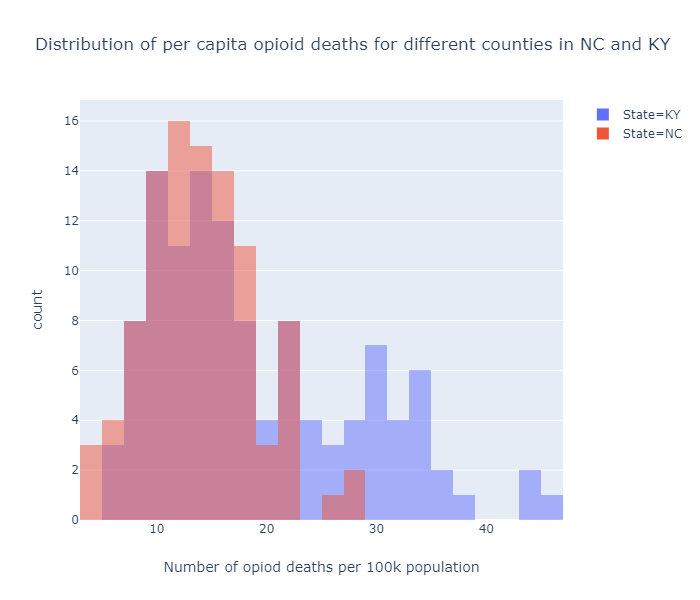

In [10]:
Image(filename='../images/ajay/stage_1/newplot.png')

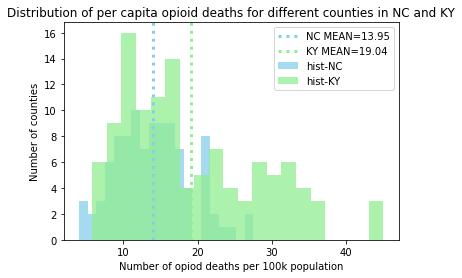

In [11]:
#plt.figure(figsize = (15, 15))
plt.hist(NC['Norm_Deaths'],bins=20,alpha=0.75,color='skyblue',label='hist-NC')
plt.hist(KY['Norm_Deaths'],bins=20,alpha=0.75,color='lightgreen',label='hist-KY')
plt.title('Distribution of per capita opioid deaths for different counties in NC and KY')
plt.axvline(x=NC_mean, color='skyblue', linestyle='dotted', linewidth=3,label = 'NC MEAN=13.95')
plt.axvline(x=KY_mean, color='lightgreen', linestyle='dotted', linewidth=3,label = 'KY MEAN=19.04')
plt.xlabel('Number of opiod deaths per 100k population')
plt.ylabel('Number of counties')
plt.legend()

## Evaluate a distribution for the Normalized Mortality Rate

- The distribution for the opioid mortality rate is continuous hence selecting a normal distribution.
- The data is centered for the mean i.e., most of the data is around mean.

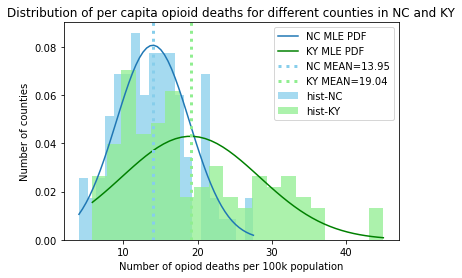

In [12]:
data=NC['Norm_Deaths']
plt.hist(data,bins=20,alpha=0.75,color='skyblue',label='hist-NC',density=True)
[mean,std]=stats.norm.fit(data)
x=np.linspace(np.min(data),np.max(data))
plt.plot(x,stats.norm.pdf(x,mean,std),label='NC MLE PDF')
plt.title('Distribution of per capita opioid deaths for different counties in NC and KY')
plt.xlabel('Number of opiod deaths per 100k population')
plt.ylabel('Number of counties')

data1=KY['Norm_Deaths']
plt.hist(data1,bins=20,alpha=0.75,color='lightgreen',label='hist-KY',density=True)
[mean1,std1]=stats.norm.fit(data1)
x1=np.linspace(np.min(data1),np.max(data1))
plt.plot(x1,stats.norm.pdf(x1,mean1,std1),color='green',label='KY MLE PDF')

plt.axvline(x=NC_mean, color='skyblue', linestyle='dotted', linewidth=3,label = 'NC MEAN=13.95')
plt.axvline(x=KY_mean, color='lightgreen', linestyle='dotted', linewidth=3,label = 'KY MEAN=19.04')
plt.legend()



## KDE

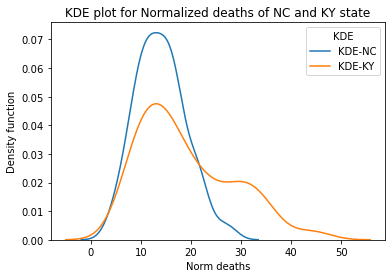

In [13]:
plt.figure()
sns.kdeplot(data=data,legend=True)
sns.kdeplot(data=data1,legend=True)

plt.xlabel('Norm deaths')
plt.ylabel('Density function')
plt.title('KDE plot for Normalized deaths of NC and KY state')
plt.legend(title='KDE', loc='upper right', labels=['KDE-NC', 'KDE-KY'])
plt.show()

## MoM

### For NC state

13.957575757575757
4.938962613627101


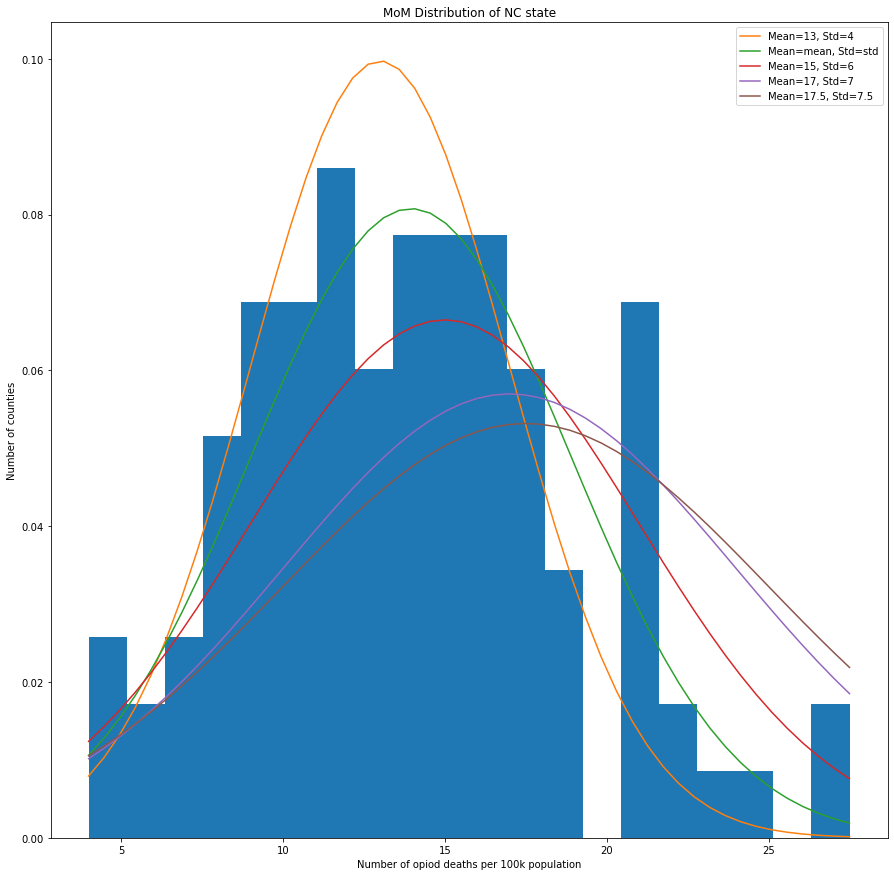

In [14]:
plt.figure(figsize = (15, 15))
data=NC['Norm_Deaths']
plt.hist(data,bins=20,density=True)
[mean,std]=stats.norm.fit(data)
print(mean)
print(std)
x=np.linspace(np.min(data),np.max(data))
plt.plot(x,stats.norm.pdf(x,13,4),label='Mean=13, Std=4')
plt.plot(x,stats.norm.pdf(x,mean,std),label='Mean=mean, Std=std')
plt.plot(x,stats.norm.pdf(x,15,6),label='Mean=15, Std=6')
plt.plot(x,stats.norm.pdf(x,17,7),label='Mean=17, Std=7')
plt.plot(x,stats.norm.pdf(x,17.5,7.5),label='Mean=17.5, Std=7.5')
plt.title('MoM Distribution of NC state')
plt.xlabel('Number of opiod deaths per 100k population')
plt.ylabel('Number of counties')
plt.legend()

## For KY state

19.041379310344826
9.283272581457515


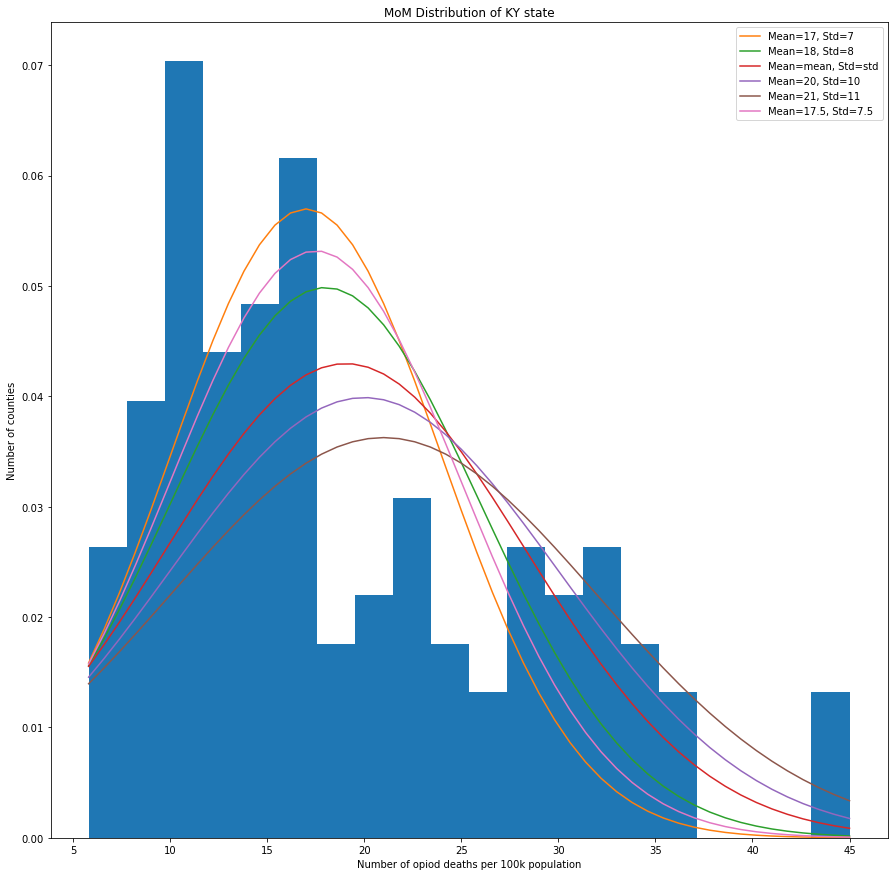

In [15]:
plt.figure(figsize = (15, 15))
data1=KY['Norm_Deaths']
plt.hist(data1,bins=20,density=True)
[mean1,std1]=stats.norm.fit(data1)
print(mean1)
print(std1)
x1=np.linspace(np.min(data1),np.max(data1))

plt.plot(x1,stats.norm.pdf(x1,17,7),label='Mean=17, Std=7')
plt.plot(x1,stats.norm.pdf(x1,18,8),label='Mean=18, Std=8')
plt.plot(x1,stats.norm.pdf(x1,mean1,std1),label='Mean=mean, Std=std')
plt.plot(x1,stats.norm.pdf(x1,20,10),label='Mean=20, Std=10')
plt.plot(x1,stats.norm.pdf(x1,21,11),label='Mean=21, Std=11')
plt.plot(x1,stats.norm.pdf(x1,17.5,7.5),label='Mean=17.5, Std=7.5')
plt.title('MoM Distribution of KY state')
plt.xlabel('Number of opiod deaths per 100k population')
plt.ylabel('Number of counties')
plt.legend()

### M1.3 Select the top two states identified in Stage I and recreate the M1.2 task

In [16]:
statec=["CA"]
CA=df.loc[df['State'].isin(statec)]
CA

State  County Code  Opiod_Dispensing_Rate                      County  \
153    CA         6001                   20.4          Alameda County, CA   
154    CA         6005                   29.4           Amador County, CA   
155    CA         6007                   70.0            Butte County, CA   
156    CA         6009                   27.7        Calaveras County, CA   
157    CA         6011                   27.3           Colusa County, CA   
158    CA         6013                   25.8     Contra Costa County, CA   
159    CA         6015                   56.2        Del Norte County, CA   
160    CA         6017                   30.0        El Dorado County, CA   
161    CA         6019                   46.2           Fresno County, CA   
162    CA         6021                   36.4            Glenn County, CA   
163    CA         6023                   55.6         Humboldt County, CA   
164    CA         6025                   27.6         Imperial County, CA   
165    CA         6027                   26.2             Inyo County, CA   
166    CA         6029                   37.4             Kern County, CA   
167    CA         6031                   36.2            Kings County, CA   
168    CA         6033                   34.6             Lake County, CA   
169    CA         6035                   46.5           Lassen County, CA   
170    CA         6037                   26.8      Los Angeles County, CA   
171    CA         6039                   19.4           Madera County, CA   
172    CA         6041                   22.5            Marin County, CA   
173    CA         6043                   17.3         Mariposa County, CA   
174    CA         6045                   59.3        Mendocino County, CA   
175    CA         6047                   36.5           Merced County, CA   
176    CA         6049                   31.2            Modoc County, CA   
177    CA         6051                   30.8             Mono County, CA   
178    CA         6053                   28.6         Monterey County, CA   
179    CA         6055                   27.2             Napa County, CA   
180    CA         6057                   42.1           Nevada County, CA   
181    CA         6059                   31.8           Orange County, CA   
182    CA         6061                   48.8           Placer County, CA   
183    CA         6063                   46.8           Plumas County, CA   
184    CA         6065                   29.6        Riverside County, CA   
185    CA         6067                   37.0       Sacramento County, CA   
186    CA         6069                   15.9       San Benito County, CA   
187    CA         6071                   37.5   San Bernardino County, CA   
188    CA         6073                   27.8        San Diego County, CA   
189    CA         6075                   34.5    San Francisco County, CA   
190    CA         6077                   27.4      San Joaquin County, CA   
191    CA         6079                   45.3  San Luis Obispo County, CA   
192    CA         6081                   19.8        San Mateo County, CA   
193    CA         6083                   43.0    Santa Barbara County, CA   
194    CA         6085                   20.0      Santa Clara County, CA   
195    CA         6087                   29.0       Santa Cruz County, CA   
196    CA         6089                   70.6           Shasta County, CA   
197    CA         6091                    5.5           Sierra County, CA   
198    CA         6093                   61.1         Siskiyou County, CA   
199    CA         6095                   22.9           Solano County, CA   
200    CA         6097                   33.3           Sonoma County, CA   
201    CA         6099                   59.6       Stanislaus County, CA   
202    CA         6101                   75.5           Sutter County, CA   
203    CA         6103                   42.6           Tehama County, CA   


In [17]:
stated=["MA"]
MA=df.loc[df['State'].isin(stated)]
MA

State  County Code  Opiod_Dispensing_Rate                 County  \
990     MA        25001                   35.0  Barnstable County, MA   
991     MA        25003                   39.0   Berkshire County, MA   
992     MA        25005                   43.6     Bristol County, MA   
993     MA        25007                   29.4       Dukes County, MA   
994     MA        25009                   27.9       Essex County, MA   
995     MA        25011                   30.4    Franklin County, MA   
996     MA        25013                   48.4     Hampden County, MA   
997     MA        25015                   34.1   Hampshire County, MA   
998     MA        25017                   24.1   Middlesex County, MA   
999     MA        25019                   31.5   Nantucket County, MA   
1000    MA        25021                   26.6     Norfolk County, MA   
1001    MA        25023                   27.5    Plymouth County, MA   
1002    MA        25025                   65.1     Suffolk County, MA   
1003    MA        25027                   35.7   Worcester County, MA   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
990      4579885     961         21.0               20               171   
991      2745524     482         17.6               20               173   
992     11529231    3060         26.5               20               175   
993       343214      36         10.5               20               177   
994     15727542    3232         20.5               20               179   
995      1497564     209         14.0               20               181   
996      9731718    1853         19.0               20               183   
997      3306903     428         12.9               20               185   
998     31822193    4529         14.2               20               187   
999       214714      14          6.5               20               189   
1000    14114650    2190         15.5               20               191   
1001    10395515    2044         19.7               20               193   
1002    15345995    3251         21.2               20               195   
1003    16673206    3086         18.5               20               197   

      5-digit FIPS Code  ... Male population 18-44 raw value  \
990               20171  ...                             NaN   
991               20173  ...                             NaN   
992               20175  ...                             NaN   
993               20177  ...                             NaN   
994               20179  ...                             NaN   
995               20181  ...                             NaN   
996               20183  ...                             NaN   
997               20185  ...                             NaN   
998               20187  ...                             NaN   
999               20189  ...                             NaN   
1000              20191  ...                             NaN   
1001              20193  ...                             NaN   
1002              20195  ...                             NaN   
1003              20197  ...                             NaN   

     Male population 45-64 raw value  Male population 65+ raw value  \
990                              NaN                            NaN   
991                              NaN                            NaN   
992                              NaN                            NaN   
993                              NaN                            NaN   
994                              NaN                            NaN   
995                              NaN                            NaN   
996                              NaN                            NaN   
997                              NaN                            NaN   
998                              NaN                            NaN   
999                              NaN                            NaN   
1000                      

In [18]:
MA1=MA.groupby('State')['Norm_Deaths'].agg(['mean']).reset_index()
MA_mean=MA1['mean'][0]
MA_mean
CA1=CA.groupby('State')['Norm_Deaths'].agg(['mean']).reset_index()
CA_mean=CA1['mean'][0]
CA_mean

14.68421052631579

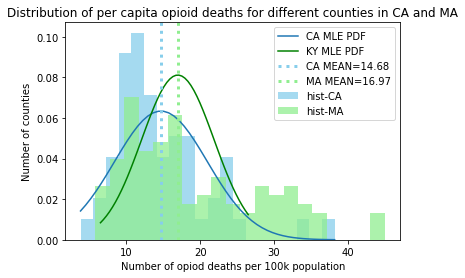

In [19]:
data3=CA['Norm_Deaths']
plt.hist(data3,bins=20,alpha=0.75,color='skyblue',label='hist-CA',density=True)
[mean3,std3]=stats.norm.fit(data3)
x3=np.linspace(np.min(data3),np.max(data3))
plt.plot(x3,stats.norm.pdf(x3,mean3,std3),label='CA MLE PDF')
plt.title('Distribution of per capita opioid deaths for different counties in CA and MA')
plt.xlabel('Number of opiod deaths per 100k population')
plt.ylabel('Number of counties')

data4=MA['Norm_Deaths']
plt.hist(data1,bins=20,alpha=0.75,color='lightgreen',label='hist-MA',density=True)
[mean4,std4]=stats.norm.fit(data4)
x4=np.linspace(np.min(data4),np.max(data4))
plt.plot(x4,stats.norm.pdf(x4,mean4,std4),color='green',label='KY MLE PDF')

plt.axvline(x=CA_mean, color='skyblue', linestyle='dotted', linewidth=3,label = 'CA MEAN=14.68')
plt.axvline(x=MA_mean, color='lightgreen', linestyle='dotted', linewidth=3,label = 'MA MEAN=16.97')
plt.legend()

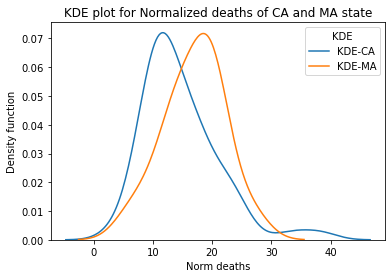

In [20]:
plt.figure()
sns.kdeplot(data=data3,legend=True)
sns.kdeplot(data=data4,legend=True)

plt.xlabel('Norm deaths')
plt.ylabel('Density function')
plt.title('KDE plot for Normalized deaths of CA and MA state')
plt.legend(title='KDE', loc='upper right', labels=['KDE-CA', 'KDE-MA'])
plt.show()

14.684210526315788
6.291480998037038


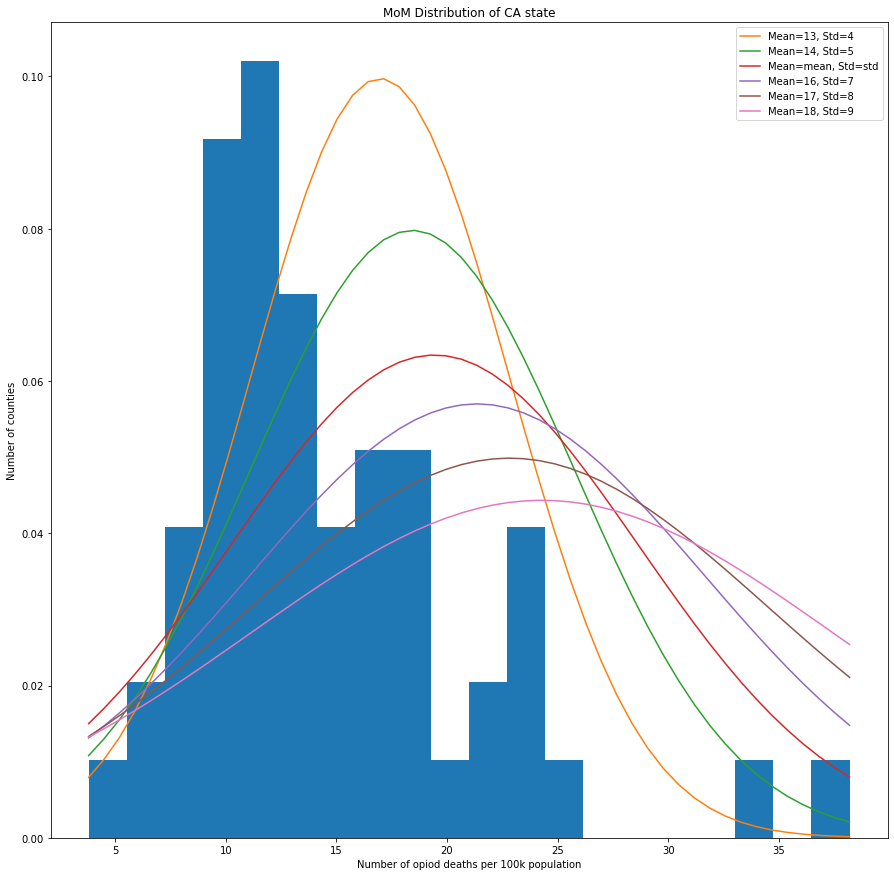

In [21]:
plt.figure(figsize = (15, 15))
data3=CA['Norm_Deaths']
plt.hist(data3,bins=20,density=True)
[mean3,std3]=stats.norm.fit(data3)
x3=np.linspace(np.min(data3),np.max(data3))
print(mean3)
print(std3)

plt.plot(x3,stats.norm.pdf(x,13,4),label='Mean=13, Std=4')
plt.plot(x3,stats.norm.pdf(x,14,5),label='Mean=14, Std=5')
plt.plot(x3,stats.norm.pdf(x,mean3,std3),label='Mean=mean, Std=std')
plt.plot(x3,stats.norm.pdf(x,16,7),label='Mean=16, Std=7')
plt.plot(x3,stats.norm.pdf(x,17,8),label='Mean=17, Std=8')
plt.plot(x3,stats.norm.pdf(x,18,9),label='Mean=18, Std=9')
plt.title('MoM Distribution of CA state')
plt.xlabel('Number of opiod deaths per 100k population')
plt.ylabel('Number of counties')
plt.legend()

16.971428571428568
4.916652254100863


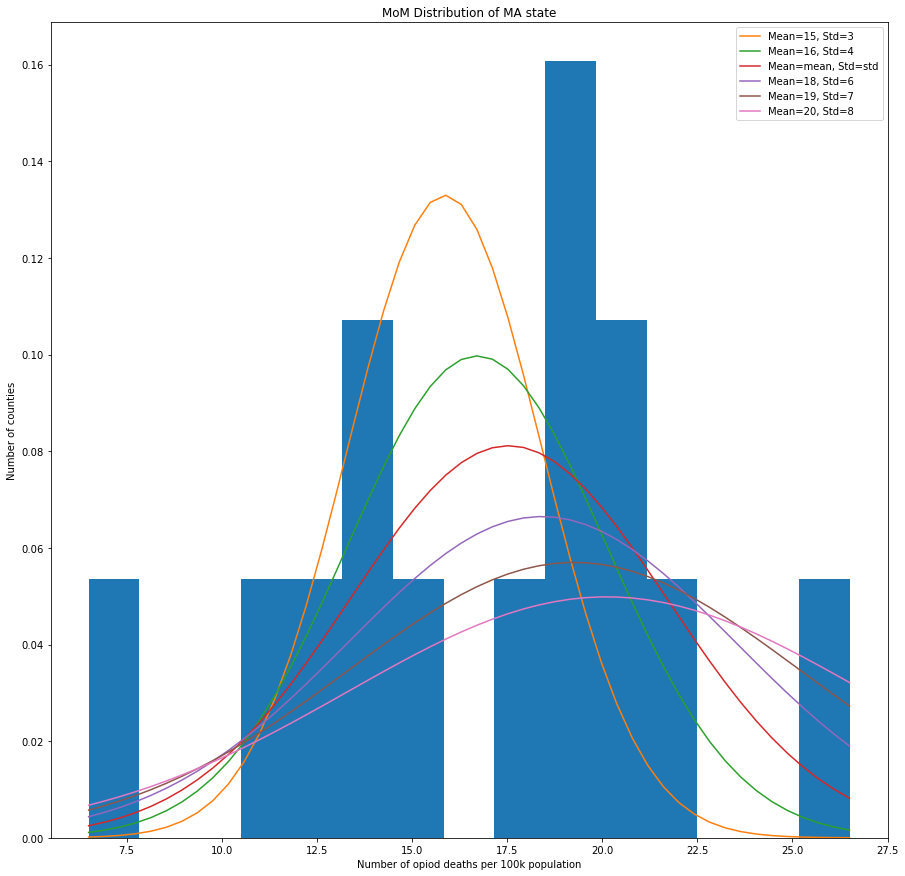

In [22]:
plt.figure(figsize = (15, 15))
data4=MA['Norm_Deaths']
plt.hist(data4,bins=15,density=True)
[mean4,std4]=stats.norm.fit(data4)
x4=np.linspace(np.min(data4),np.max(data4))
print(mean4)
print(std4)

plt.plot(x4,stats.norm.pdf(x,15,3),label='Mean=15, Std=3')
plt.plot(x4,stats.norm.pdf(x,16,4),label='Mean=16, Std=4')
plt.plot(x4,stats.norm.pdf(x,mean4,std4),label='Mean=mean, Std=std')
plt.plot(x4,stats.norm.pdf(x,18,6),label='Mean=18, Std=6')
plt.plot(x4,stats.norm.pdf(x,19,7),label='Mean=19, Std=7')
plt.plot(x4,stats.norm.pdf(x,20,8),label='Mean=20, Std=8')
plt.title('MoM Distribution of MA state')
plt.xlabel('Number of opiod deaths per 100k population')
plt.ylabel('Number of counties')
plt.legend()

### Discuss the results

- The distribution selected is normal distribution as the data is continuous.
- The most likelihood estimator MLE is for the mean and standard deviation for the data.
- The mean for NC is 13.95 and the mean for KY is 19.04.
- Different estimates were performed for the values around the mean and standard deviation to estimate the MLE.
- The mean for CA is 14.68 and the mean for MA is 16.97.
- A KDE plot is shown for all the different data.

## Hypothesis Testing and Regression
### Formulate Hypothesis for 5 identified variables in Stage 1 and test the hypothesis

#### 1. Hypothesis testing for Premature death raw value

- NULL HYPOTHESIS(H0): Higher and lower premature deaths have similar impact on opioid deaths.
- ALTERNATE hYPOTHESIS(H1): Higher and lower premature deaths have different impact on opioid deaths.

In [23]:
df

State  County Code  Opiod_Dispensing_Rate                 County  \
0       AL         1001                  101.3     Autauga County, AL   
1       AL         1003                   67.6     Baldwin County, AL   
2       AL         1005                   27.2     Barbour County, AL   
3       AL         1007                   21.0        Bibb County, AL   
4       AL         1009                   23.7      Blount County, AL   
...    ...          ...                    ...                    ...   
2522    WY        56033                   33.5    Sheridan County, WY   
2523    WY        56037                   70.0  Sweetwater County, WY   
2524    WY        56039                   54.6       Teton County, WY   
2525    WY        56041                   59.5       Uinta County, WY   
2526    WY        56043                   46.7    Washakie County, WY   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
0        1087149      83          7.6                1                 0   
1        3758097     535         14.2                1                 1   
2         574442      14          2.4                1                 3   
3         464942      56         12.0                1                 5   
4        1171455     168         14.3                1                 7   
...          ...     ...          ...              ...               ...   
2522      598998      61         10.2               47               103   
2523      873221     123         14.1               47               105   
2524      440125      13          3.0               47               107   
2525      426347      61         14.3               47               109   
2526      172114      14          8.1               47               111   

      5-digit FIPS Code  ... Male population 18-44 raw value  \
0                  1000  ...                             NaN   
1                  1001  ...                             NaN   
2                  1003  ...                             NaN   
3                  1005  ...                             NaN   
4                  1007  ...                             NaN   
...                 ...  ...                             ...   
2522              47103  ...                             NaN   
2523              47105  ...                             NaN   
2524              47107  ...                             NaN   
2525              47109  ...                             NaN   
2526              47111  ...                             NaN   

     Male population 45-64 raw value  Male population 65+ raw value  \
0                                NaN                            NaN   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
2522                             NaN                            NaN   
2523                             NaN                            NaN   
2524                             NaN                            NaN   
2525                             NaN                            NaN   
2526                             NaN                            NaN   

      Total male population raw value  Female population 0-17 raw value  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   
...                               ...                               ...   
2522                              NaN                               

In [24]:
df['norm_prem_death']=round((df['Premature death raw value']/df['Population'])*100000,1)

In [25]:
df.norm_prem_death.mean()

1548.7550443906405

In [26]:
df.norm_prem_death.max()

14176.4

In [27]:
bins = [0, 1548.755,14176.4]
labels = [0,1]
df['prem_label'] = pd.cut(df['norm_prem_death'], bins=bins, labels=labels)

In [28]:
df_prem_death_0 = df[df["prem_label"] == 0]
df_prem_death_1 = df[df["prem_label"] == 1]

In [29]:
stats.ttest_ind(a= df_prem_death_0.Norm_Deaths,
                b= df_prem_death_1.Norm_Deaths,
                equal_var=False)

Ttest_indResult(statistic=9.02155978533168, pvalue=4.499097704861509e-19)

- Performing a Two-sample T-test
- P value is almost equal to zero. So, we reject the NULL hypothesis.
- **Higher and lower values of premature deaths have different impact on opioid deaths.**

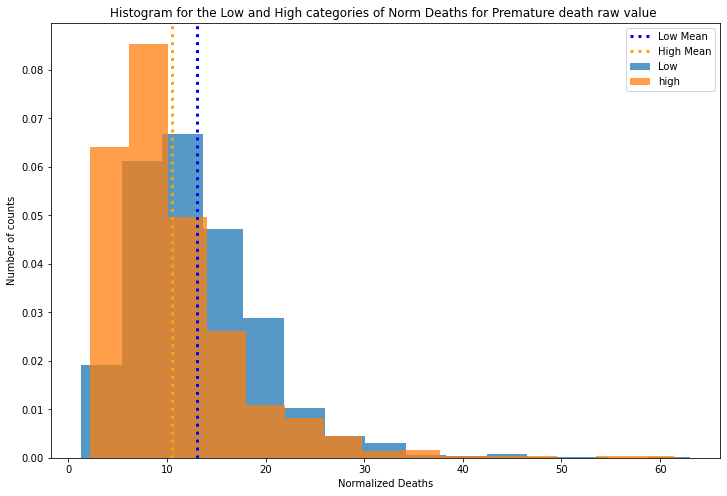

In [30]:
plt.figure(figsize = (12, 8))
plt.hist(df_prem_death_0.Norm_Deaths,bins=15,alpha=0.75,density=True,label='Low')
plt.hist(df_prem_death_1.Norm_Deaths,bins=15,alpha=0.75,density=True,label='high')
plt.axvline(x=df_prem_death_0.Norm_Deaths.mean(), linestyle='dotted', color='blue', linewidth=3,label = 'Low Mean')
plt.axvline(x=df_prem_death_1.Norm_Deaths.mean(), linestyle='dotted', color='orange', linewidth=3,label = 'High Mean')
plt.title('Histogram for the Low and High categories of Norm Deaths for Premature death raw value ')
plt.xlabel('Normalized Deaths')
plt.ylabel('Number of counts')
plt.legend()

#### 2. Hypothesis testing for Population

- NULL HYPOTHESIS(H0): Higher and lower Population have similar impact on opioid deaths.
- ALTERNATE hYPOTHESIS(H1): Higher and lower Population have different impact on opioid deaths.

In [31]:
df.Population.mean()

2508004.362089434

In [32]:
df.Population.median()

754672.0

In [33]:
df.Population.max()

207016779

In [34]:
bins = [0, 754672.0,207016779]
labels = [0,1]
df['population_label'] = pd.cut(df['Population'], bins=bins, labels=labels)
df

State  County Code  Opiod_Dispensing_Rate                 County  \
0       AL         1001                  101.3     Autauga County, AL   
1       AL         1003                   67.6     Baldwin County, AL   
2       AL         1005                   27.2     Barbour County, AL   
3       AL         1007                   21.0        Bibb County, AL   
4       AL         1009                   23.7      Blount County, AL   
...    ...          ...                    ...                    ...   
2522    WY        56033                   33.5    Sheridan County, WY   
2523    WY        56037                   70.0  Sweetwater County, WY   
2524    WY        56039                   54.6       Teton County, WY   
2525    WY        56041                   59.5       Uinta County, WY   
2526    WY        56043                   46.7    Washakie County, WY   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
0        1087149      83          7.6                1                 0   
1        3758097     535         14.2                1                 1   
2         574442      14          2.4                1                 3   
3         464942      56         12.0                1                 5   
4        1171455     168         14.3                1                 7   
...          ...     ...          ...              ...               ...   
2522      598998      61         10.2               47               103   
2523      873221     123         14.1               47               105   
2524      440125      13          3.0               47               107   
2525      426347      61         14.3               47               109   
2526      172114      14          8.1               47               111   

      5-digit FIPS Code  ... Total male population raw value  \
0                  1000  ...                             NaN   
1                  1001  ...                             NaN   
2                  1003  ...                             NaN   
3                  1005  ...                             NaN   
4                  1007  ...                             NaN   
...                 ...  ...                             ...   
2522              47103  ...                             NaN   
2523              47105  ...                             NaN   
2524              47107  ...                             NaN   
2525              47109  ...                             NaN   
2526              47111  ...                             NaN   

     Female population 0-17 raw value  Female population 18-44 raw value  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   
...                               ...                                ...   
2522                              NaN                                NaN   
2523                              NaN                                NaN   
2524                              NaN                                NaN   
2525                              NaN                                NaN   
2526                              NaN                                NaN   

      Female population 45-64 raw value  Female population 65+ raw value  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   NaN                              NaN   
4                                   NaN                              NaN   
...                                 ...                              ...   
2

In [35]:
df_pop_0 = df[df["population_label"] == 0]
df_pop_1 = df[df["population_label"] == 1]

In [36]:
stats.ttest_ind(a= df_pop_0.Norm_Deaths,
                b= df_pop_1.Norm_Deaths,
                equal_var=False)

Ttest_indResult(statistic=-10.708517621434273, pvalue=3.3726260423235096e-26)

- Performing a Two-sample T-test
- P value is almost equal to zero. So, we reject the NULL hypothesis.
- **Higher and lower values of population have different impact on opioid deaths.**

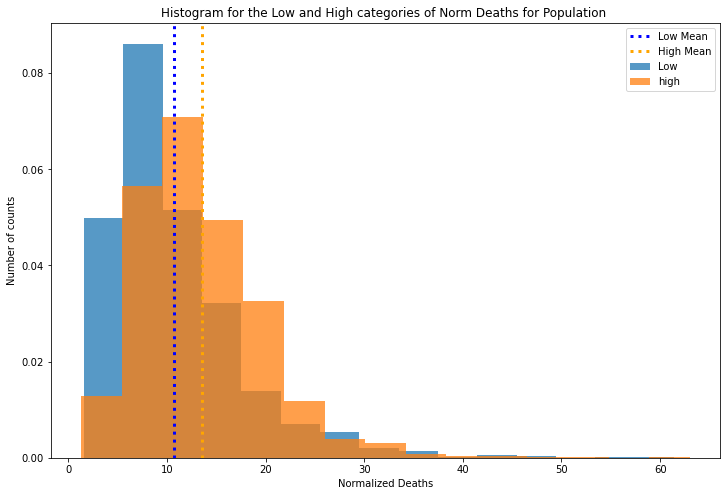

In [37]:
plt.figure(figsize = (12, 8))
plt.hist(df_pop_0.Norm_Deaths,bins=15,alpha=0.75,density=True,label='Low')
plt.hist(df_pop_1.Norm_Deaths,bins=15,alpha=0.75,density=True,label='high')
plt.axvline(x=df_pop_0.Norm_Deaths.mean(), linestyle='dotted', color='blue', linewidth=3,label = 'Low Mean')
plt.axvline(x=df_pop_1.Norm_Deaths.mean(), linestyle='dotted', color='orange', linewidth=3,label = 'High Mean')
plt.title('Histogram for the Low and High categories of Norm Deaths for Population ')
plt.xlabel('Normalized Deaths')
plt.ylabel('Number of counts')
plt.legend()

#### 3. Hypothesis testing for Deaths

- NULL HYPOTHESIS(H0): Higher and lower Deaths have similar impact on opioid deaths.
- ALTERNATE hYPOTHESIS(H1): Higher and lower Deaths have different impact on opioid deaths.

In [38]:
df.Deaths.mean()

347.58844479620103

In [39]:
df.Deaths.median()

82.0

In [40]:
df.Deaths.max()

17130

In [41]:
bins = [0, 347.58844479620103,17130]
labels = [0,1]
df['death_label'] = pd.cut(df['Deaths'], bins=bins, labels=labels)
df

State  County Code  Opiod_Dispensing_Rate                 County  \
0       AL         1001                  101.3     Autauga County, AL   
1       AL         1003                   67.6     Baldwin County, AL   
2       AL         1005                   27.2     Barbour County, AL   
3       AL         1007                   21.0        Bibb County, AL   
4       AL         1009                   23.7      Blount County, AL   
...    ...          ...                    ...                    ...   
2522    WY        56033                   33.5    Sheridan County, WY   
2523    WY        56037                   70.0  Sweetwater County, WY   
2524    WY        56039                   54.6       Teton County, WY   
2525    WY        56041                   59.5       Uinta County, WY   
2526    WY        56043                   46.7    Washakie County, WY   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
0        1087149      83          7.6                1                 0   
1        3758097     535         14.2                1                 1   
2         574442      14          2.4                1                 3   
3         464942      56         12.0                1                 5   
4        1171455     168         14.3                1                 7   
...          ...     ...          ...              ...               ...   
2522      598998      61         10.2               47               103   
2523      873221     123         14.1               47               105   
2524      440125      13          3.0               47               107   
2525      426347      61         14.3               47               109   
2526      172114      14          8.1               47               111   

      5-digit FIPS Code  ... Female population 0-17 raw value  \
0                  1000  ...                              NaN   
1                  1001  ...                              NaN   
2                  1003  ...                              NaN   
3                  1005  ...                              NaN   
4                  1007  ...                              NaN   
...                 ...  ...                              ...   
2522              47103  ...                              NaN   
2523              47105  ...                              NaN   
2524              47107  ...                              NaN   
2525              47109  ...                              NaN   
2526              47111  ...                              NaN   

     Female population 18-44 raw value  Female population 45-64 raw value  \
0                                  NaN                                NaN   
1                                  NaN                                NaN   
2                                  NaN                                NaN   
3                                  NaN                                NaN   
4                                  NaN                                NaN   
...                                ...                                ...   
2522                               NaN                                NaN   
2523                               NaN                                NaN   
2524                               NaN                                NaN   
2525                               NaN                                NaN   
2526                               NaN                                NaN   

      Female population 65+ raw value  Total female population raw value  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   
...                               ...                

In [42]:
df_death_0 = df[df["death_label"] == 0]
df_death_1 = df[df["death_label"] == 1]

In [43]:
stats.ttest_ind(a= df_death_0.Norm_Deaths,
                b= df_death_1.Norm_Deaths,
                equal_var=False)

Ttest_indResult(statistic=-16.059641170200585, pvalue=1.7030009801334991e-49)

- Performing a Two-sample T-test
- P value is almost equal to zero. So, we reject the NULL hypothesis.
- **Higher and lower values of deaths have different impact on opioid deaths.**

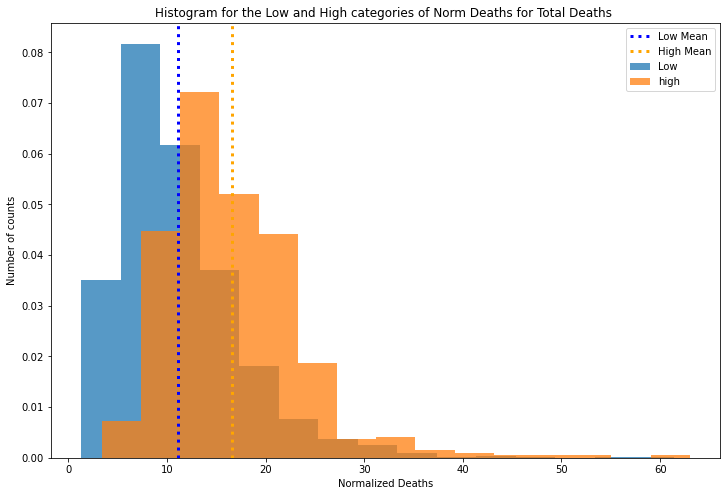

In [44]:
plt.figure(figsize = (12, 8))
plt.hist(df_death_0.Norm_Deaths,bins=15,alpha=0.75,density=True,label='Low')
plt.hist(df_death_1.Norm_Deaths,bins=15,alpha=0.75,density=True,label='high')
plt.axvline(x=df_death_0.Norm_Deaths.mean(), linestyle='dotted', color='blue', linewidth=3,label = 'Low Mean')
plt.axvline(x=df_death_1.Norm_Deaths.mean(), linestyle='dotted', color='orange', linewidth=3,label = 'High Mean')
plt.title('Histogram for the Low and High categories of Norm Deaths for Total Deaths ')
plt.xlabel('Normalized Deaths')
plt.ylabel('Number of counts')
plt.legend()

In [45]:
# Adult smoking raw value
# Excessive drinking raw value
# Teen births raw value
# High school graduation raw value
# Unemployment raw value
# Income inequality raw value

#### 4. Hypothesis testing for Unemployment

- NULL HYPOTHESIS(H0): Higher and lower Unemployment have similar impact on opioid deaths.
- ALTERNATE hYPOTHESIS(H1): Higher and lower Unemployment have different impact on opioid deaths.

In [46]:
df['Unemployment raw value'].mean()

0.0464747579243864

In [47]:
df['Unemployment raw value'].max()

0.200713013

In [48]:
bins = [0, 0.0464747579243864,0.200713013]
labels = [0,1]
df['unemployment_label'] = pd.cut(df['Unemployment raw value'], bins=bins, labels=labels)
df

State  County Code  Opiod_Dispensing_Rate                 County  \
0       AL         1001                  101.3     Autauga County, AL   
1       AL         1003                   67.6     Baldwin County, AL   
2       AL         1005                   27.2     Barbour County, AL   
3       AL         1007                   21.0        Bibb County, AL   
4       AL         1009                   23.7      Blount County, AL   
...    ...          ...                    ...                    ...   
2522    WY        56033                   33.5    Sheridan County, WY   
2523    WY        56037                   70.0  Sweetwater County, WY   
2524    WY        56039                   54.6       Teton County, WY   
2525    WY        56041                   59.5       Uinta County, WY   
2526    WY        56043                   46.7    Washakie County, WY   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
0        1087149      83          7.6                1                 0   
1        3758097     535         14.2                1                 1   
2         574442      14          2.4                1                 3   
3         464942      56         12.0                1                 5   
4        1171455     168         14.3                1                 7   
...          ...     ...          ...              ...               ...   
2522      598998      61         10.2               47               103   
2523      873221     123         14.1               47               105   
2524      440125      13          3.0               47               107   
2525      426347      61         14.3               47               109   
2526      172114      14          8.1               47               111   

      5-digit FIPS Code  ... Female population 18-44 raw value  \
0                  1000  ...                               NaN   
1                  1001  ...                               NaN   
2                  1003  ...                               NaN   
3                  1005  ...                               NaN   
4                  1007  ...                               NaN   
...                 ...  ...                               ...   
2522              47103  ...                               NaN   
2523              47105  ...                               NaN   
2524              47107  ...                               NaN   
2525              47109  ...                               NaN   
2526              47111  ...                               NaN   

     Female population 45-64 raw value  Female population 65+ raw value  \
0                                  NaN                              NaN   
1                                  NaN                              NaN   
2                                  NaN                              NaN   
3                                  NaN                              NaN   
4                                  NaN                              NaN   
...                                ...                              ...   
2522                               NaN                              NaN   
2523                               NaN                              NaN   
2524                               NaN                              NaN   
2525                               NaN                              NaN   
2526                               NaN                              NaN   

      Total female population raw value  Population growth raw value  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
2522             

In [49]:
df_unemployment_0 = df[df["unemployment_label"] == 0]
df_unemployment_1 = df[df["unemployment_label"] == 1]

In [50]:
stats.ttest_ind(a= df_unemployment_0.Norm_Deaths,
                b= df_unemployment_1.Norm_Deaths,
                equal_var=False)

Ttest_indResult(statistic=5.201788516733834, pvalue=2.138128353801589e-07)

- Performing a Two-sample T-test
- P value is almost equal to zero. So, we reject the NULL hypothesis.
- **Higher and lower values of unemployment have different impact on opioid deaths.**

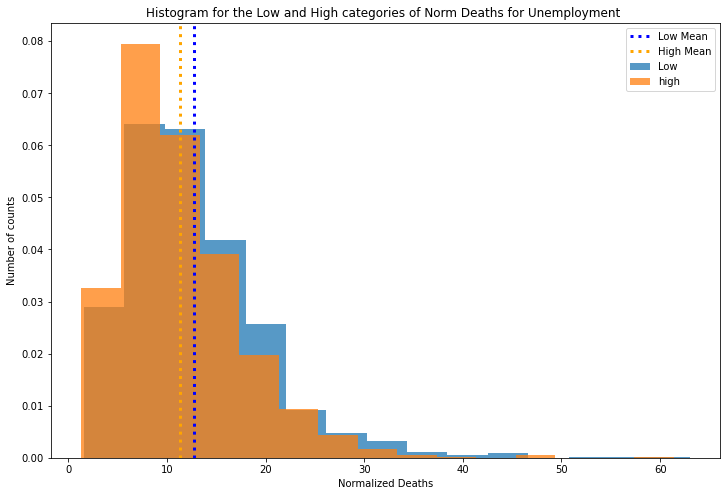

In [51]:
plt.figure(figsize = (12, 8))
plt.hist(df_unemployment_0.Norm_Deaths,bins=15,alpha=0.75,density=True,label='Low')
plt.hist(df_unemployment_1.Norm_Deaths,bins=15,alpha=0.75,density=True,label='high')
plt.axvline(x=df_unemployment_0.Norm_Deaths.mean(), linestyle='dotted', color='blue', linewidth=3,label = 'Low Mean')
plt.axvline(x=df_unemployment_1.Norm_Deaths.mean(), linestyle='dotted', color='orange', linewidth=3,label = 'High Mean')
plt.title('Histogram for the Low and High categories of Norm Deaths for Unemployment ')
plt.xlabel('Normalized Deaths')
plt.ylabel('Number of counts')
plt.legend()

#### 5. Hypothesis testing for High school graduation

- NULL HYPOTHESIS(H0): Higher and lower High school graduation rate have similar impact on opioid deaths.
- ALTERNATE hYPOTHESIS(H1): Higher and lower High school graduation rate have different impact on opioid deaths.

In [52]:
df['High school graduation raw value'].mean()

0.8755222635652704

In [53]:
df['High school graduation raw value'].max()

1.0

In [54]:
bins = [0, 0.8755222635652704,1]
labels = [0,1]
df['grad_label'] = pd.cut(df['High school graduation raw value'], bins=bins, labels=labels)
df

State  County Code  Opiod_Dispensing_Rate                 County  \
0       AL         1001                  101.3     Autauga County, AL   
1       AL         1003                   67.6     Baldwin County, AL   
2       AL         1005                   27.2     Barbour County, AL   
3       AL         1007                   21.0        Bibb County, AL   
4       AL         1009                   23.7      Blount County, AL   
...    ...          ...                    ...                    ...   
2522    WY        56033                   33.5    Sheridan County, WY   
2523    WY        56037                   70.0  Sweetwater County, WY   
2524    WY        56039                   54.6       Teton County, WY   
2525    WY        56041                   59.5       Uinta County, WY   
2526    WY        56043                   46.7    Washakie County, WY   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
0        1087149      83          7.6                1                 0   
1        3758097     535         14.2                1                 1   
2         574442      14          2.4                1                 3   
3         464942      56         12.0                1                 5   
4        1171455     168         14.3                1                 7   
...          ...     ...          ...              ...               ...   
2522      598998      61         10.2               47               103   
2523      873221     123         14.1               47               105   
2524      440125      13          3.0               47               107   
2525      426347      61         14.3               47               109   
2526      172114      14          8.1               47               111   

      5-digit FIPS Code  ... Female population 45-64 raw value  \
0                  1000  ...                               NaN   
1                  1001  ...                               NaN   
2                  1003  ...                               NaN   
3                  1005  ...                               NaN   
4                  1007  ...                               NaN   
...                 ...  ...                               ...   
2522              47103  ...                               NaN   
2523              47105  ...                               NaN   
2524              47107  ...                               NaN   
2525              47109  ...                               NaN   
2526              47111  ...                               NaN   

     Female population 65+ raw value  Total female population raw value  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   
...                              ...                                ...   
2522                             NaN                                NaN   
2523                             NaN                                NaN   
2524                             NaN                                NaN   
2525                             NaN                                NaN   
2526                             NaN                                NaN   

      Population growth raw value  norm_prem_death  prem_label  \
0                             NaN            912.2           0   
1                             NaN            234.8           0   
2                             NaN           1257.7           0   
3                             NaN           2061.8           1   
4                             NaN           1005.9           0   
...                           ...              ...         ...   
2522                          NaN           1733.4         

In [55]:
df_grad_0 = df[df["grad_label"] == 0]
df_grad_1 = df[df["grad_label"] == 1]

In [56]:
stats.ttest_ind(a= df_grad_0.Norm_Deaths,
                b= df_grad_1.Norm_Deaths,
                equal_var=False)

Ttest_indResult(statistic=-1.8374344697281295, pvalue=0.06626867697740615)

- Performing a Two-sample T-test
- P value is 0.066. So, there is a similarity in data and we can APPROVE the NULL hypothesis.
- **Higher and lower values of High school graduation rate have similar impact on opioid deaths.**

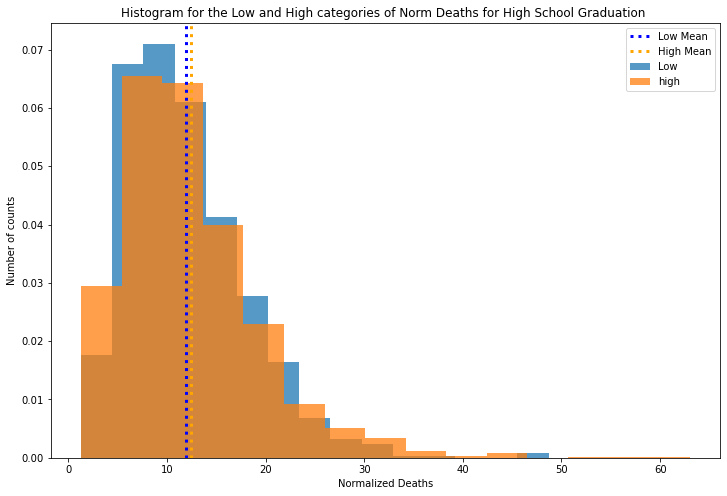

In [57]:
plt.figure(figsize = (12, 8))
plt.hist(df_grad_0.Norm_Deaths,bins=15,alpha=0.75,density=True,label='Low')
plt.hist(df_grad_1.Norm_Deaths,bins=15,alpha=0.75,density=True,label='high')
plt.axvline(x=df_grad_0.Norm_Deaths.mean(), linestyle='dotted', color='blue', linewidth=3,label = 'Low Mean')
plt.axvline(x=df_grad_1.Norm_Deaths.mean(), linestyle='dotted', color='orange', linewidth=3,label = 'High Mean')
plt.title('Histogram for the Low and High categories of Norm Deaths for High School Graduation ')
plt.xlabel('Normalized Deaths')
plt.ylabel('Number of counts')
plt.legend()

#### 6. Hypothesis testing for Excessive drinking

- NULL HYPOTHESIS(H0): Higher and lower Excessive drinking rate have similar impact on opioid deaths.
- ALTERNATE hYPOTHESIS(H1): Higher and lower Excessive drinking rate have different impact on opioid deaths.

In [58]:
df['Excessive drinking raw value'].mean()

0.17430659053423014

In [59]:
df['Excessive drinking raw value'].max()

0.28004742

In [60]:
bins = [0, 0.17430659053423014,0.28004742]
labels = [0,1]
df['drinking_label'] = pd.cut(df['Excessive drinking raw value'], bins=bins, labels=labels)
df

State  County Code  Opiod_Dispensing_Rate                 County  \
0       AL         1001                  101.3     Autauga County, AL   
1       AL         1003                   67.6     Baldwin County, AL   
2       AL         1005                   27.2     Barbour County, AL   
3       AL         1007                   21.0        Bibb County, AL   
4       AL         1009                   23.7      Blount County, AL   
...    ...          ...                    ...                    ...   
2522    WY        56033                   33.5    Sheridan County, WY   
2523    WY        56037                   70.0  Sweetwater County, WY   
2524    WY        56039                   54.6       Teton County, WY   
2525    WY        56041                   59.5       Uinta County, WY   
2526    WY        56043                   46.7    Washakie County, WY   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
0        1087149      83          7.6                1                 0   
1        3758097     535         14.2                1                 1   
2         574442      14          2.4                1                 3   
3         464942      56         12.0                1                 5   
4        1171455     168         14.3                1                 7   
...          ...     ...          ...              ...               ...   
2522      598998      61         10.2               47               103   
2523      873221     123         14.1               47               105   
2524      440125      13          3.0               47               107   
2525      426347      61         14.3               47               109   
2526      172114      14          8.1               47               111   

      5-digit FIPS Code  ... Female population 65+ raw value  \
0                  1000  ...                             NaN   
1                  1001  ...                             NaN   
2                  1003  ...                             NaN   
3                  1005  ...                             NaN   
4                  1007  ...                             NaN   
...                 ...  ...                             ...   
2522              47103  ...                             NaN   
2523              47105  ...                             NaN   
2524              47107  ...                             NaN   
2525              47109  ...                             NaN   
2526              47111  ...                             NaN   

     Total female population raw value  Population growth raw value  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   
...                                ...                          ...   
2522                               NaN                          NaN   
2523                               NaN                          NaN   
2524                               NaN                          NaN   
2525                               NaN                          NaN   
2526                               NaN                          NaN   

      norm_prem_death  prem_label  population_label  death_label  \
0               912.2           0                 1            0   
1               234.8           0                 1            1   
2              1257.7           0                 0            0   
3              2061.8           1                 0            0   
4              1005.9           0                 1            0   
...               ...         ...               ...          ...   
2522           1733.4           1                 0            0   
2523           1129.7           0                

In [61]:
df_drink_0 = df[df["drinking_label"] == 0]
df_drink_1 = df[df["drinking_label"] == 1]

In [62]:
stats.ttest_ind(a= df_drink_0.Norm_Deaths,
                b= df_drink_1.Norm_Deaths,
                equal_var=False)

Ttest_indResult(statistic=-2.5460820595401525, pvalue=0.010953578259390718)

- Performing a Two-sample T-test
- P value is equal to 0.01 which is less than the 95th percentile. So, we reject the NULL hypothesis.
- **Higher and lower values of Excessie drinking have different impact on opioid deaths.**

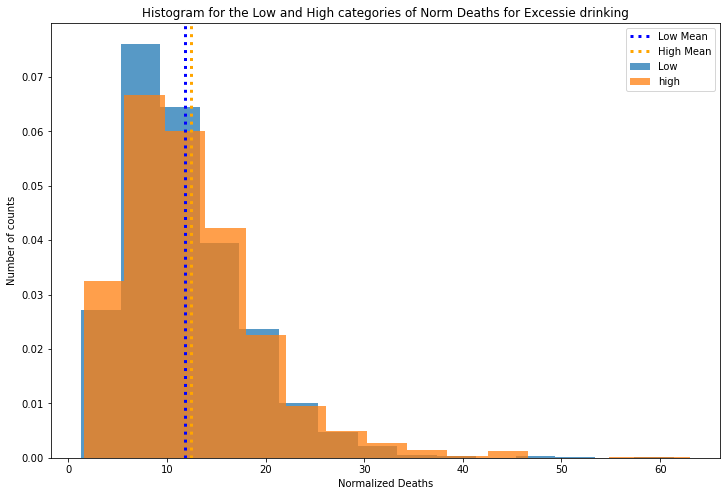

In [63]:
plt.figure(figsize = (12, 8))
plt.hist(df_drink_0.Norm_Deaths,bins=15,alpha=0.75,density=True,label='Low')
plt.hist(df_drink_1.Norm_Deaths,bins=15,alpha=0.75,density=True,label='high')
plt.axvline(x=df_drink_0.Norm_Deaths.mean(), linestyle='dotted', color='blue', linewidth=3,label = 'Low Mean')
plt.axvline(x=df_drink_1.Norm_Deaths.mean(), linestyle='dotted', color='orange', linewidth=3,label = 'High Mean')
plt.title('Histogram for the Low and High categories of Norm Deaths for Excessie drinking')
plt.xlabel('Normalized Deaths')
plt.ylabel('Number of counts')
plt.legend()

## M2.2 Perform linear regression to discover patterns

In [64]:
df

State  County Code  Opiod_Dispensing_Rate                 County  \
0       AL         1001                  101.3     Autauga County, AL   
1       AL         1003                   67.6     Baldwin County, AL   
2       AL         1005                   27.2     Barbour County, AL   
3       AL         1007                   21.0        Bibb County, AL   
4       AL         1009                   23.7      Blount County, AL   
...    ...          ...                    ...                    ...   
2522    WY        56033                   33.5    Sheridan County, WY   
2523    WY        56037                   70.0  Sweetwater County, WY   
2524    WY        56039                   54.6       Teton County, WY   
2525    WY        56041                   59.5       Uinta County, WY   
2526    WY        56043                   46.7    Washakie County, WY   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
0        1087149      83          7.6                1                 0   
1        3758097     535         14.2                1                 1   
2         574442      14          2.4                1                 3   
3         464942      56         12.0                1                 5   
4        1171455     168         14.3                1                 7   
...          ...     ...          ...              ...               ...   
2522      598998      61         10.2               47               103   
2523      873221     123         14.1               47               105   
2524      440125      13          3.0               47               107   
2525      426347      61         14.3               47               109   
2526      172114      14          8.1               47               111   

      5-digit FIPS Code  ... Female population 65+ raw value  \
0                  1000  ...                             NaN   
1                  1001  ...                             NaN   
2                  1003  ...                             NaN   
3                  1005  ...                             NaN   
4                  1007  ...                             NaN   
...                 ...  ...                             ...   
2522              47103  ...                             NaN   
2523              47105  ...                             NaN   
2524              47107  ...                             NaN   
2525              47109  ...                             NaN   
2526              47111  ...                             NaN   

     Total female population raw value  Population growth raw value  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   
...                                ...                          ...   
2522                               NaN                          NaN   
2523                               NaN                          NaN   
2524                               NaN                          NaN   
2525                               NaN                          NaN   
2526                               NaN                          NaN   

      norm_prem_death  prem_label  population_label  death_label  \
0               912.2           0                 1            0   
1               234.8           0                 1            1   
2              1257.7           0                 0            0   
3              2061.8           1                 0            0   
4              1005.9           0                 1            0   
...               ...         ...               ...          ...   
2522           1733.4           1                 0            0   
2523           1129.7           0                

### Normalize the opioid dispensing rate to population

In [65]:
odr_norm= round((df['Opiod_Dispensing_Rate']/df['Population'])*100000,1)
odr_norm
x=odr_norm

r=df[['Population','Deaths','5-digit FIPS Code','Norm_Deaths','Premature death raw value']]
z=df['Opiod_Dispensing_Rate']

In [66]:
x=x.values
y=df['Norm_Deaths'].values

In [67]:
x=x.reshape(2527,1)
y=y.reshape(2527,1)

Model Intercept
[12.03296673]
Model coefficient
[[0.01586545]]


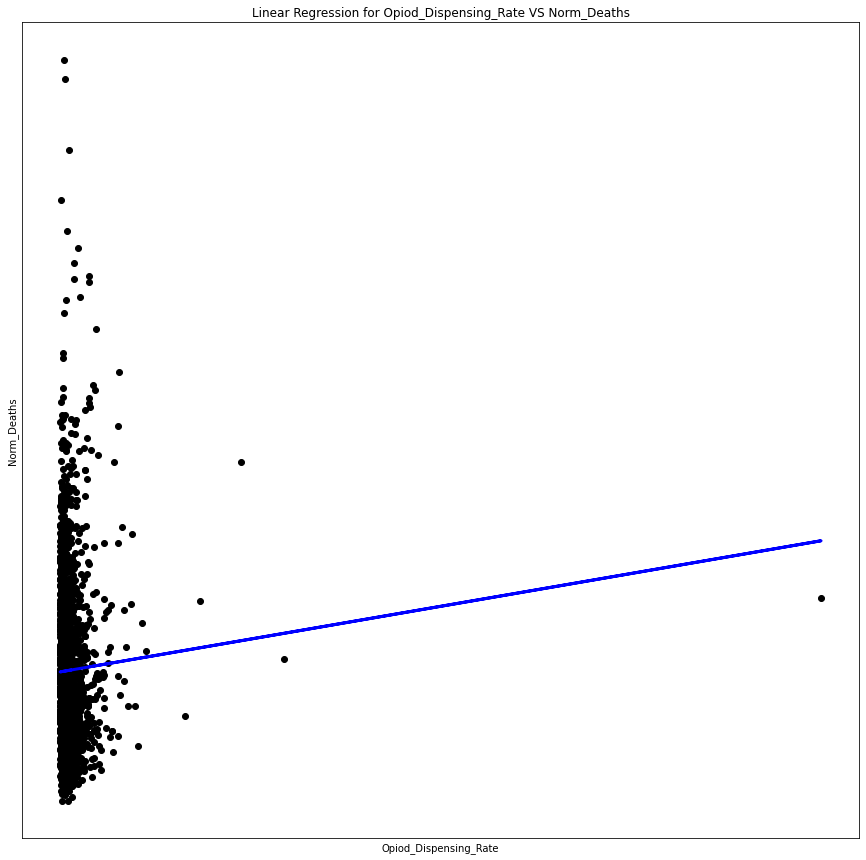

In [68]:
plt.figure(figsize = (15, 15))
model = LinearRegression()
model.fit(x,y)
#To retrieve the intercept:
print('Model Intercept')
print(model.intercept_)

#For retrieving the slope:
print('Model coefficient')
print(model.coef_)
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Linear Regression for Opiod_Dispensing_Rate VS Norm_Deaths')
plt.xlabel('Opiod_Dispensing_Rate')
plt.ylabel('Norm_Deaths')
plt.show()

##### R square :

In [69]:
model.score(x,y)

0.001603319468074238

### Evaluating the model

In [70]:
meanAbErr = metrics.mean_absolute_error(x, model.predict(x))
meanSqErr = metrics.mean_squared_error(x, model.predict(x))
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(x, model.predict(x)))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 0.16
Mean Absolute Error: 8.841499425716867
Mean Square Error: 304.10574347689555
Root Mean Square Error: 17.438627912679816


### Multi linear regression

In [71]:
r=df[['Population','Deaths','5-digit FIPS Code','Norm_Deaths','Premature death raw value']]
z=df['Opiod_Dispensing_Rate']

In [72]:
r=r.fillna(0)
z=z.fillna(0)

In [73]:
from sklearn.model_selection import train_test_split
r_train, r_test, z_train, z_test = train_test_split(r, z, test_size = 0.25, random_state = 100)

In [74]:
model1 = LinearRegression()  
model1.fit(r_train, z_train)

LinearRegression()

In [75]:
print("Intercept: ", model1.intercept_)
print("Coefficients:")
list(zip(r, model1.coef_))

Intercept:  29.434596692190237
Coefficients:


[('Population', 3.768006771896267e-08),
 ('Deaths', -0.0005744908587818967),
 ('5-digit FIPS Code', -0.00019913247603462858),
 ('Norm_Deaths', 1.4129309409994102),
 ('Premature death raw value', 0.00034636874974119914)]

In [76]:
z_pred= model1.predict(r_test)
z_pred

array([ 58.14529605,  39.10339896,  53.79130795,  48.09871429,
        57.34744693,  32.10720783,  43.1484924 ,  36.16810271,
        35.67023278,  50.29562415,  41.13697205,  48.81377275,
        46.8845102 ,  41.41239012,  48.5406175 ,  40.1526623 ,
        50.13739892,  50.59095041,  54.25405441,  49.55981831,
        33.8579324 , 101.29030045,  43.79148218,  40.65170903,
        48.53649866,  47.5570442 ,  33.16174511,  74.07886345,
        37.09037211,  36.59892042,  56.18815489,  49.63369328,
        41.09794752,  53.31460373,  30.77074259,  35.87781442,
        35.63049984,  32.85306602,  39.35192411,  33.83422748,
        51.49090654,  42.03498115,  39.45251753,  35.06908404,
        41.20902706,  47.1632923 ,  41.76631097,  47.29561165,
        35.25820246,  37.12839237,  41.446654  ,  40.94469153,
        39.93860106,  32.0232246 ,  46.35273172,  38.28463278,
        40.13985144,  44.87760337,  42.84818393,  36.47548401,
        63.16072445,  41.83351803,  65.31852565,  54.54

In [77]:
m = pd.DataFrame({'Actual value': z_test, 'Predicted value': z_pred})
m.head()

Actual value  Predicted value
176           31.2        58.145296
2267          51.3        39.103399
65            36.2        53.791308
182           48.8        48.098714
316           43.3        57.347447

### Evaluating the model

In [78]:
meanAbErr = metrics.mean_absolute_error(z_test, z_pred)
meanSqErr = metrics.mean_squared_error(z_test, z_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(z_test, z_pred))
print('R squared: {:.2f}'.format(model1.score(r,z)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 7.15
Mean Absolute Error: 20.274673762172917
Mean Square Error: 787.600784471143
Root Mean Square Error: 28.06422606221563


- R squared is 7.15, this tells us that the model fits the data for only 7.15%.
- Mean Absolute Error is 20.274673762172917 which is pretty high.
- Mean Square Error is 787.600784471143 which is pretty high.
- Root Mean Square Error is 28.06422606221563 which is pretty high.

### Non linear Model n=(2,3,4)

In [79]:
degree =5       
poly = PolynomialFeatures(degree)
poly.fit(r)
r_poly = poly.transform(r)
r_range = np.linspace(r.min(), r.max(), len(r))
r_range_poly = poly.transform(r_range)


In [80]:
model = LinearRegression(fit_intercept=False)
model.fit(r_poly, z)

LinearRegression(fit_intercept=False)

In [81]:
z_poly = model.predict(r_range_poly)

Text(0.5, 1.0, 'Polynomial Regression for opioid dispensing rate')

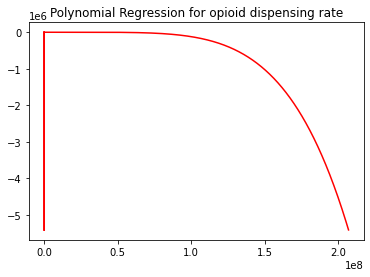

In [82]:
plt.plot(r_range.squeeze(),z_poly,color = 'red')
plt.title('Polynomial Regression for opioid dispensing rate')

In [83]:
model.score(r_poly, z)

-1.3504298255396678

In [84]:
meanAbErr = metrics.mean_absolute_error(z, z_poly)
meanSqErr = metrics.mean_squared_error(z, z_poly)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(z, z_poly))
print('R squared: {:.2f}'.format(model1.score(r,z)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 7.15
Mean Absolute Error: 877344.4745245463
Mean Square Error: 2593248730650.7046
Root Mean Square Error: 1610356.7091333226


In [85]:
r

Population  Deaths  5-digit FIPS Code  Norm_Deaths  \
0        1087149      83               1000          7.6   
1        3758097     535               1001         14.2   
2         574442      14               1003          2.4   
3         464942      56               1005         12.0   
4        1171455     168               1007         14.3   
...          ...     ...                ...          ...   
2522      598998      61              47103         10.2   
2523      873221     123              47105         14.1   
2524      440125      13              47107          3.0   
2525      426347      61              47109         14.3   
2526      172114      14              47111          8.1   

      Premature death raw value  
0                   9917.232898  
1                   8824.057123  
2                   7224.632160  
3                   9586.165037  
4                  11783.543680  
...                         ...  
2522               10383.005550  
2523                9864.497671  
2524               10674.484520  
2525               11517.238300  
2526               10860.543360  

[2527 rows x 5 columns]

In [86]:
z

0       101.3
1        67.6
2        27.2
3        21.0
4        23.7
        ...  
2522     33.5
2523     70.0
2524     54.6
2525     59.5
2526     46.7
Name: Opiod_Dispensing_Rate, Length: 2527, dtype: float64

In [87]:
mse = []
coeff = []
intercept = []
r2 = []
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    model = Pipeline([('polynomial_features', PolynomialFeatures(degree=degree)),('model', LinearRegression())])
    model.fit(r, z)
    z_pred = model.predict(r)
    
    r2.append(metrics.r2_score(z, z_pred))
    mse.append(metrics.mean_squared_error(z, z_pred, squared=False))  
    coeff.append(model.steps[1][1].coef_) 
    intercept.append(model.steps[1][1].intercept_)

In [88]:
pd.set_option('display.max_colwidth', None)
result = pd.DataFrame(list(zip(degrees, coeff, intercept)), columns = ['degrees', 'Coefficients', 'Intercepts'])
result

degrees  \
0        1   
1        2   
2        3   
3        4   
4        5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Coefficients  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [89]:
r2 = pd.DataFrame(np.column_stack([degrees, r2, mse]), columns=['Degree', 'r2_score', 'MSE'])
r2

Degree  r2_score        MSE
0     1.0  0.072213  31.898297
1     2.0  0.084907  31.679323
2     3.0 -0.026926  33.559309
3     4.0  0.027163  32.663551
4     5.0 -0.000034  33.116980

#### Using the method in class resources

In [90]:
df

State  County Code  Opiod_Dispensing_Rate                 County  \
0       AL         1001                  101.3     Autauga County, AL   
1       AL         1003                   67.6     Baldwin County, AL   
2       AL         1005                   27.2     Barbour County, AL   
3       AL         1007                   21.0        Bibb County, AL   
4       AL         1009                   23.7      Blount County, AL   
...    ...          ...                    ...                    ...   
2522    WY        56033                   33.5    Sheridan County, WY   
2523    WY        56037                   70.0  Sweetwater County, WY   
2524    WY        56039                   54.6       Teton County, WY   
2525    WY        56041                   59.5       Uinta County, WY   
2526    WY        56043                   46.7    Washakie County, WY   

      Population  Deaths  Norm_Deaths  State FIPS Code  County FIPS Code  \
0        1087149      83          7.6                1                 0   
1        3758097     535         14.2                1                 1   
2         574442      14          2.4                1                 3   
3         464942      56         12.0                1                 5   
4        1171455     168         14.3                1                 7   
...          ...     ...          ...              ...               ...   
2522      598998      61         10.2               47               103   
2523      873221     123         14.1               47               105   
2524      440125      13          3.0               47               107   
2525      426347      61         14.3               47               109   
2526      172114      14          8.1               47               111   

      5-digit FIPS Code  ... Female population 65+ raw value  \
0                  1000  ...                             NaN   
1                  1001  ...                             NaN   
2                  1003  ...                             NaN   
3                  1005  ...                             NaN   
4                  1007  ...                             NaN   
...                 ...  ...                             ...   
2522              47103  ...                             NaN   
2523              47105  ...                             NaN   
2524              47107  ...                             NaN   
2525              47109  ...                             NaN   
2526              47111  ...                             NaN   

     Total female population raw value  Population growth raw value  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   
...                                ...                          ...   
2522                               NaN                          NaN   
2523                               NaN                          NaN   
2524                               NaN                          NaN   
2525                               NaN                          NaN   
2526                               NaN                          NaN   

      norm_prem_death  prem_label  population_label  death_label  \
0               912.2           0                 1            0   
1               234.8           0                 1            1   
2              1257.7           0                 0            0   
3              2061.8           1                 0            0   
4              1005.9           0                 1            0   
...               ...         ...               ...          ...   
2522           1733.4           1                 0            0   
2523           1129.7           0                

In [91]:
odr_norm= round((df['Opiod_Dispensing_Rate']/df['Population'])*100000,1)
odr_norm
x=odr_norm

In [92]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Opiod_Dispensing_Rate ~ Population', data=df).fit()

# print the coefficients
lm.params

Intercept     4.391988e+01
Population    1.367170e-07
dtype: float64

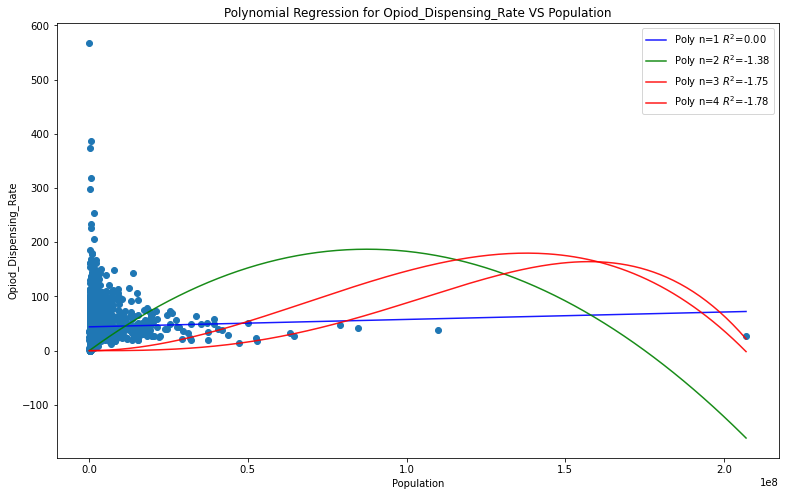

In [93]:
plt.figure(figsize=(8 * 1.618, 8))

plt.scatter(df.Population, df.Opiod_Dispensing_Rate)

df1 = data

poly_1 = smf.ols(formula='Opiod_Dispensing_Rate ~ 1 + Population', data=df).fit()

x = pd.DataFrame({'Population': np.linspace(df.Population.min(), df.Population.max(), 200)})


plt.plot(x.Population, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Opiod_Dispensing_Rate ~ 1 + Population + I(Population ** 2.0)', data=df).fit()
plt.plot(x.Population, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Opiod_Dispensing_Rate ~ 1 + Population + I(Population ** 2.0) + I(Population ** 3.0)', data=df).fit()
plt.plot(x.Population, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

# 4th order polynomial
poly_4 = smf.ols(formula='Opiod_Dispensing_Rate ~ 1 + Population + I(Population ** 2.0) + I(Population ** 3.0)+ I(Population ** 4.0)', data=df).fit()
plt.plot(x.Population, poly_4.predict(x), 'r-', alpha=0.9, label='Poly n=4 $R^2$=%.2f' % poly_4.rsquared)

plt.title('Polynomial Regression for Opiod_Dispensing_Rate VS Population')
plt.xlabel('Population')
plt.ylabel('Opiod_Dispensing_Rate')
plt.legend()

In [94]:
poly_4.summary()

C:\Users\ajayk\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning:

divide by zero encountered in double_scalars



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Opiod_Dispensing_Rate   R-squared:                      -1.778
Model:                               OLS   Adj. R-squared:                 -1.780
Method:                    Least Squares   F-statistic:                    -1616.
Date:                   Sun, 11 Dec 2022   Prob (F-statistic):               1.00
Time:                           16:02:03   Log-Likelihood:                -13721.
No. Observations:                   2527   AIC:                         2.745e+04
Df Residuals:                       2525   BIC:                         2.746e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7.091e-46   2.71e-46      2.621      0.009    1.78e-46    1.24e-45
Population            -1.06e-30   4.04e-31     -2.621      0.009   -1.85e-30   -2.67e-31
I(Population ** 2.0)  2.819e-30   1.08e-30      2.621      0.009     7.1e-31    4.93e-30
I(Population ** 3.0)  1.679e-22   6.41e-23      2.621      0.009    4.23e-23    2.94e-22
I(Population ** 4.0) -7.992e-31   3.13e-31     -2.550      0.011   -1.41e-30   -1.85e-31
==============================================================================
Omnibus:                     2205.648   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152000.845
Skew:                           3.768   Prob(JB):                         0.00
Kurtosis:                      40.240   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

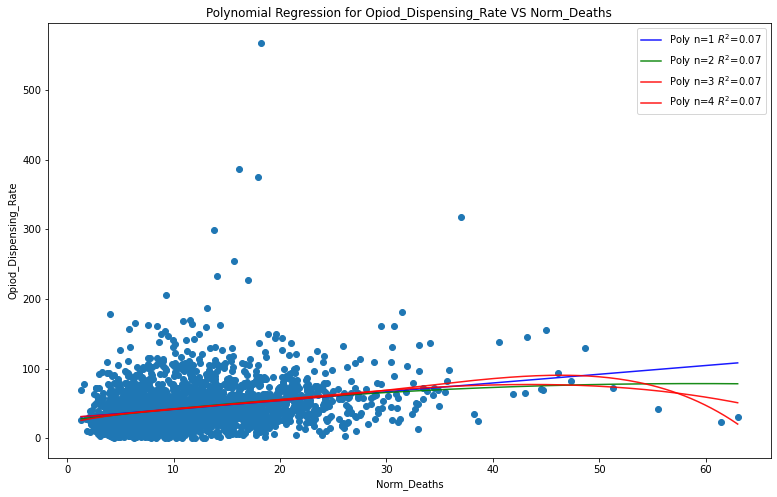

In [95]:
plt.figure(figsize=(8 * 1.618, 8))

plt.scatter(df.Norm_Deaths, df.Opiod_Dispensing_Rate)

df1 = data

poly_1 = smf.ols(formula='Opiod_Dispensing_Rate ~ 1 + Norm_Deaths', data=df).fit()

x = pd.DataFrame({'Norm_Deaths': np.linspace(df.Norm_Deaths.min(), df.Norm_Deaths.max(), 200)})


plt.plot(x.Norm_Deaths, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Opiod_Dispensing_Rate ~ 1 + Norm_Deaths + I(Norm_Deaths ** 2.0)', data=df).fit()
plt.plot(x.Norm_Deaths, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Opiod_Dispensing_Rate ~ 1 + Norm_Deaths + I(Norm_Deaths ** 2.0) + I(Norm_Deaths ** 3.0)', data=df).fit()
plt.plot(x.Norm_Deaths, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

# 4th order polynomial
poly_4 = smf.ols(formula='Opiod_Dispensing_Rate ~ 1 + Norm_Deaths + I(Norm_Deaths ** 2.0) + I(Norm_Deaths ** 3.0)+ I(Norm_Deaths ** 4.0)', data=df).fit()
plt.plot(x.Norm_Deaths, poly_4.predict(x), 'r-', alpha=0.9, label='Poly n=4 $R^2$=%.2f' % poly_4.rsquared)


plt.title('Polynomial Regression for Opiod_Dispensing_Rate VS Norm_Deaths')
plt.xlabel('Norm_Deaths')
plt.ylabel('Opiod_Dispensing_Rate')
plt.legend()

In [96]:
poly_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Opiod_Dispensing_Rate   R-squared:                       0.071
Model:                               OLS   Adj. R-squared:                  0.069
Method:                    Least Squares   F-statistic:                     48.15
Date:                   Sun, 11 Dec 2022   Prob (F-statistic):           4.49e-39
Time:                           16:02:03   Log-Likelihood:                -12337.
No. Observations:                   2527   AIC:                         2.468e+04
Df Residuals:                       2522   BIC:                         2.471e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                21.5004      4.512      4.765      0.000      12.652      30.348
Norm_Deaths               3.2748      1.116      2.933      0.003       1.086       5.464
I(Norm_Deaths ** 2.0)    -0.1701      0.087     -1.962      0.050      -0.340   -7.76e-05
I(Norm_Deaths ** 3.0)     0.0055      0.003      2.201      0.028       0.001       0.010
I(Norm_Deaths ** 4.0) -5.809e-05   2.32e-05     -2.507      0.012      -0.000   -1.27e-05
==============================================================================
Omnibus:                     2288.512   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180271.906
Skew:                           3.958   Prob(JB):                         0.00
Kurtosis:                      43.614   Cond. No.                     4.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BIAS V/S VARIANCE description

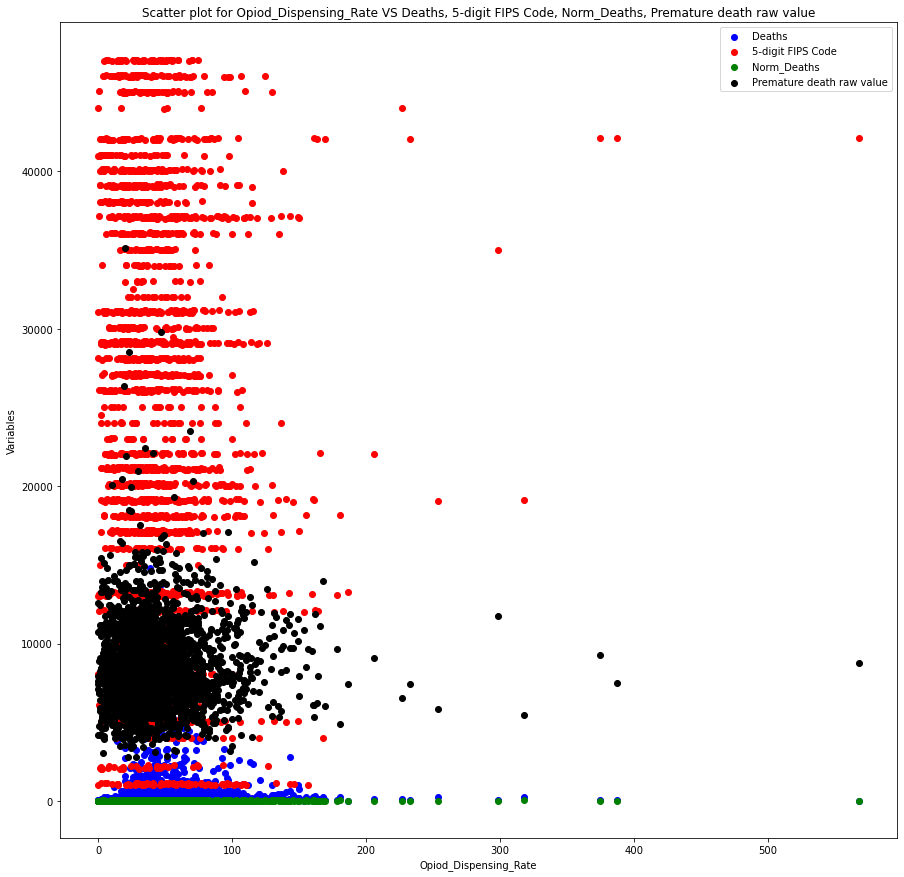

In [97]:
plt.figure(figsize = (15, 15))
#plt.scatter(df['Opiod_Dispensing_Rate'],df['Population'],  color='yellow',label='Population')
plt.scatter(df['Opiod_Dispensing_Rate'],df['Deaths'],  color='blue',label='Deaths')
plt.scatter(df['Opiod_Dispensing_Rate'],df['5-digit FIPS Code'],  color='red', label='5-digit FIPS Code')
plt.scatter(df['Opiod_Dispensing_Rate'],df['Norm_Deaths'],  color='green',label='Norm_Deaths')
plt.scatter(df['Opiod_Dispensing_Rate'],df['Premature death raw value'],  color='black',label='Premature death raw value')
plt.title('Scatter plot for Opiod_Dispensing_Rate VS Deaths, 5-digit FIPS Code, Norm_Deaths, Premature death raw value')
plt.xlabel('Opiod_Dispensing_Rate')
plt.ylabel('Variables')
plt.legend()
plt.show()

- The above scatter plot shows the distribution of the data which was used in the multiple regression. This plot helps us to visualize the spread of the data and the variance between them.
- R square score is very low for all the models (Linear/Multiple/Multiple non linear). This tells us that he model is unable to fit the data.
- The data has high bias and high variance and have a high error.
- Population was not considered as the values of the population are very high and if population is considered then the performance will be lower as the population data has very high variance.